# Лабораторная работа №2

In [1202]:
import matplotlib.pyplot as plt
import numpy as np

In [1203]:
def cyclic_freq(T: float):
    return 2 * np.pi / T

In [1204]:
def period(f: float):
    return 1 / f

In [1205]:
def DFT_slow(x):
    
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)

    return np.dot(M, x)

In [1206]:
def apply_fft(y: np.ndarray):

    n = len(y)

    xfft = np.arange(n)
    yfft = np.fft.fft(y)

    return xfft, yfft   

In [1207]:
def plot_signal(x: np.ndarray, y0: np.ndarray, **kwards):
    
    ax1 = None
    y1  = kwards.get('y1')
    xf  = kwards.get('xf')
    yf0 = kwards.get('yf0')
    yf1 = kwards.get('yf1')
    t   = kwards.get('t')
    f   = kwards.get('f')
    labely0  = kwards.get('label_y0')
    labely1  = kwards.get('label_y1')
    labelyf0 = kwards.get('label_yf0')
    labelyf1 = kwards.get('label_yf1')

    if yf0 is not None:
        fig, (ax0, ax1) = plt.subplots(2, 1)
        fig.set_figheight(7)
    else:
        fig, ax0 = plt.subplots(1, 1)
        fig.set_figheight(3)

    fig.set_figwidth(8)
    ids = range(len(x))

    if t is not None:   
        ids = np.logical_and(x >= t[0], x <= t[1])
        
    ax0.plot(x[ids], y0[ids], 'b', linewidth = 3, label = labely0)    
    ax0.set_ylabel('Амплитуда')
    ax0.set_xlabel('Время, с')

    if y1 is not None:
       ax0.plot(x[ids], y1[ids], '--', color = 'y', label = labely1) 

    if ax1 is not None:
        
        ids = range(len(xf))

        if f is not None:
            ids = np.logical_and(xf >= f[0], xf <= f[1])

        ax1.plot(xf[ids], np.abs(yf0[ids]) / len(yf0), linewidth = 3, label = labelyf0)

        if yf1 is not None:
            ax1.plot(xf[ids], np.abs(yf1[ids] / len(yf1)), '--', color = 'y', label = labelyf1)

        ax1.set_ylabel('Амплитуда')
        ax1.set_xlabel('Частота, Гц')

        if any([labelyf0, labelyf1]):
            ax1.legend(loc = 'upper right')

    if any([labely0, labely1]):
        ax0.legend(loc = 'upper right')

    plt.show()

In [1209]:
def func_x(func, A: float, T: float, t: tuple, sample_rate: int = 1000):

    x = np.linspace(t[0], t[1], num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda z: func(z, A, cyclic_freq(T)), 0, x)

    return x, y

In [1210]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

## Задание 1

In [1211]:
SAMPLE_RATE = 5000
A  = 2
f1 = 50
f2 = 150

In [1212]:
x, y0 = func_x(cos_func, A, period(f1), (0, 1), sample_rate = SAMPLE_RATE)
x1, y1 = func_x(cos_func, A, period(f2), (0, 1), sample_rate = SAMPLE_RATE)

In [1213]:
# %timeit np.fft.fft(y0)
# %timeit np.fft.fft(y1)

In [1214]:
# %timeit DFT_slow(y0)
# %timeit DFT_slow(y1)

In [1215]:
xfft0, yfft0 = apply_fft(y0)
xfft1, yfft1 = apply_fft(y1)

In [1216]:
yifft0 = np.fft.ifft(yfft0).real
yifft1 = np.fft.ifft(yfft1).real

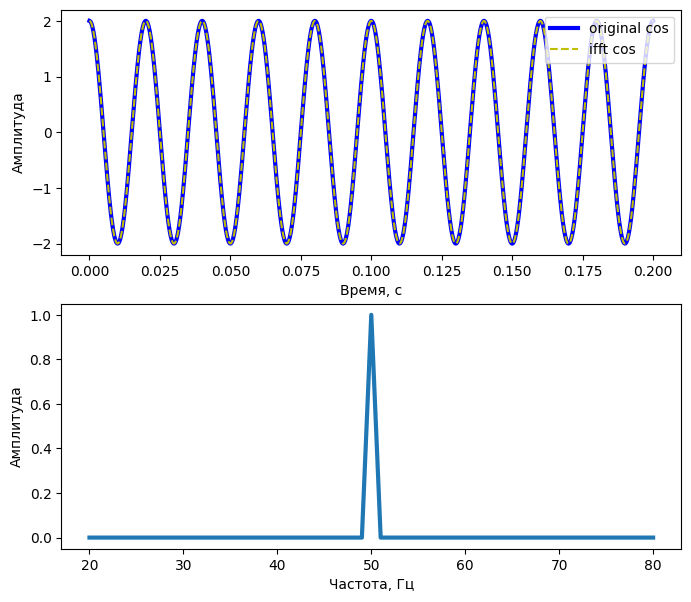

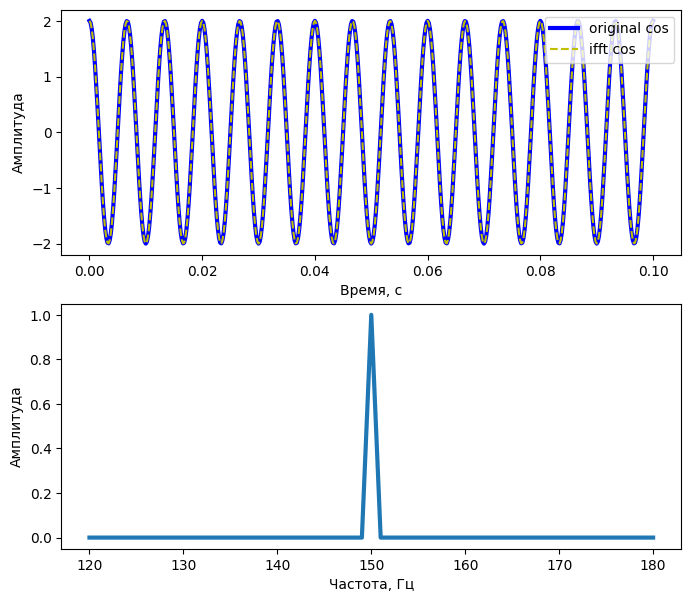

In [1217]:
plot_signal(x, y0, y1 = yifft0, xf = xfft0, yf0 = yfft0, t = (0, 0.2), f = (20, 80), \
            label_y0 = 'original cos', label_y1 = 'ifft cos')

plot_signal(x1, y1, y1 = yifft1, xf = xfft1, yf0 = yfft1, t = (0, 0.1), f = (120, 180), \
            label_y0 = 'original cos', label_y1 = 'ifft cos')